# Movie based on a script
Guillaume Witz, Science IT Support, Microscopy Imaging Center, Bern University

## Import packages and data

In [1]:
import numpy as np
import skimage
import napari
from naparimovie import Movie
%run 'download.py'
%gui qt5

In [2]:
image = skimage.io.imread('Sample/mitosis.tif',plugin='tifffile')

## Create napari viewer and movie object

In [3]:
viewer = napari.Viewer(ndisplay=3)
viewer.add_image(image[:,:,0,:,:], scale=(5,1,1),colormap = 'cyan')
viewer.add_image(image[:,:,1,:,:], scale=(5,1,1), blending = 'additive', colormap = 'magenta')
movie = Movie(myviewer=viewer)

## Create key-frames from a script

This follows the ideas of the Fiji plugin [3Dscript](https://www.nature.com/articles/s41592-019-0359-1) where commands describing modifications of the viewed volume are implemented in a natural language. Two script examples are provided [here](moviecommands.txt) [here](moviecommands2.txt). Please read the 3Dscript documentation to understand how such scripts are written. At the moment you can use:

- At frame ...
- From frame x to frame y ... 

statements to specific the range of frames. The possible modifications (with example values) are:

- zoom by a factor of 0.2
- translate by (0,40,0)
- rotate by 180 degrees around (1,0,0)
- make layer 0 visible
- make layer 0 invisible
- shift time by 3
- shift time by -45

The "time" and "make" commands are specific to this implementation.

Once the script is ready you can call it like this on your movie object:

In [4]:
movie.create_state_dict_from_script('moviecommands2.txt')

If you now go to the napari view, you can go through key frames as well as interpolated frames using the keys defined for the interactive view. Of course you can save the movie as before, as an mp4 or gif.

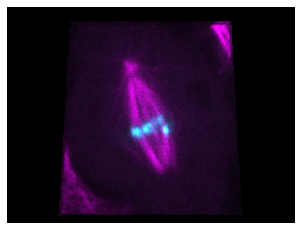

In [11]:
movie.make_movie('movie_script.mp4')

In [5]:
movie.make_gif('gif_script.gif')